# Problem Set 3, due Wednesday, May 3rd, 5:30pm.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates, in particular
differences-in-differences.  Your task is to **estimate the impact of
_progresa_ subsidies on the school attendance**.  Note: this asks to
estimate a causal effect.

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey (=1)|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre", not poor = "no pobre"|
|progresa |treatment = "basal", control = "0"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|enrolled in school in 1997 (=1) |

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [4]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

# Import and alias pyplot from matplotlib
import matplotlib.pyplot as plt

# Set plots to plot inline
%matplotlib inline 

# Import StatsModels for OLS
import statsmodels.api as sm

from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# your code here
#load the data
progresa = pd.read_csv('progresa_sample.csv.gz')
progresa.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [6]:
#Summary Statistics

#Missing observations::

progresa.isnull().sum()




year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

In [7]:
#Mean and standard deviation::
x = progresa[progresa.columns.difference(['year','folnum','village'])].describe()
progresa_mean_std = x.loc['mean':'std',:]
progresa_mean_std.T

,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?
Now let's investigate the differences in baseline.  Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages?

I suggest you to use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for poor.

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [39]:
baseline_df=pd.DataFrame(index=range(1,16),columns=['variable_name', 'avg_val_treatment','avg_val_control','Diff','p_val'])
i=1
for column in progresa:
    if((column != 'year')&(column !='folnum')&(column !='village')&(column != 'poor')&(column != 'progresa')):
        temp1=pd.Series(progresa.loc[:,column].where((progresa['poor']=="pobre")&(progresa['progresa']=="basal")&(progresa['year']==97)))
        mean_t=np.mean(temp1)
        temp2=pd.Series(progresa.loc[:,column].where((progresa['poor']=="pobre")&(progresa['progresa']=="0")&(progresa['year']==97)))
        mean_c=np.mean(temp2)
        (tval,pval)=sp.stats.ttest_ind(temp1,temp2,equal_var = False,nan_policy='omit')
        baseline_df.loc[i]=dict(variable_name=column,avg_val_treatment=mean_t,avg_val_control=mean_c,Diff=(mean_t-mean_c),p_val=pval)
        i=i+1
print (baseline_df.to_string(index=False))

variable_name avg_val_treatment avg_val_control        Diff        p_val
          sex          0.519317        0.505052   0.0142652    0.0122074
        indig          0.325986        0.332207 -0.00622198     0.245902
     dist_sec           2.45312         2.50766  -0.0545398    0.0426628
           sc          0.822697        0.815186  0.00751088    0.0964612
          grc            3.5316         3.54305  -0.0114503     0.689523
        fam_n           7.28133         7.30247  -0.0211419     0.428967
     min_dist           107.153         103.238     3.91506   7.0558e-16
     dist_cap           150.829          153.77    -2.94066   0.00114648
       hohedu           2.66314         2.59035   0.0727912    0.0103822
       hohwag            544.34         573.164     -28.824  0.000328729
welfare_index           655.428         659.579    -4.15072   0.00153168
       hohsex          0.924656        0.922947  0.00170878     0.572125
       hohage           43.6488         44.2769    

### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

In [46]:
#A:
# Null Hypothesis- There are no statistically significant differences between treatment and control
# villages as baseline

# Alternate Hypothesis-There are statistically significant differences between treatment and control
# villages as baseline

#when p-val<0.05
print(baseline_df.where(baseline_df.p_val<0.05).dropna())

# #when p-val=0.01
# print("\n alpha=0.01\n",baseline_df.where(baseline_df.p_val<0.010).dropna())


    variable_name avg_val_treatment avg_val_control       Diff        p_val
1             sex          0.519317        0.505052  0.0142652    0.0122074
3        dist_sec           2.45312         2.50766 -0.0545398    0.0426628
7        min_dist           107.153         103.238    3.91506   7.0558e-16
8        dist_cap           150.829          153.77   -2.94066   0.00114648
9          hohedu           2.66314         2.59035  0.0727912    0.0103822
10         hohwag            544.34         573.164    -28.824  0.000328729
11  welfare_index           655.428         659.579   -4.15072   0.00153168
13         hohage           43.6488         44.2769   -0.62809  2.25946e-06


A. Yes, there are statistically significant differences between the treatment and control villages at baseline as the p-value is lower than 0.05 for certain variables. For example, the following variables have statistically significant differences: min distance to the capital, nearest distance to a secondary school, age of head of household, years of schooling of head of household, monthly wages of head of household, min distance to an urban center, enrolled in school in year of survey and sex

B. Randomization is a concept used to understand causal relationships between different parameters. There are statistically significant differences between the treatment and control group prior to the treatment. Since the two groups are systematically different even before the treatment then that proves that the randomization did not work flawlessly.The effect of Progresa cannot be clearly determined through the data from the subsequent surveys.


C. Impact of treatment is measured by the differences between the outcomes of treatment and control group under randomized treatment.Since the randomization was not done effectively then we cannot use this impact measurement technique and we have to fallback on other techniques like double difference. 

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

Text(0,0.5,'Average Enrollment Rate in 1997')

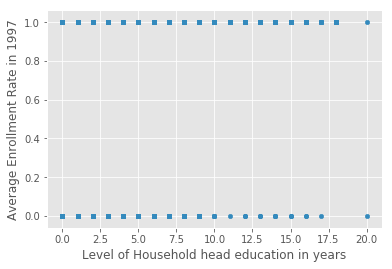

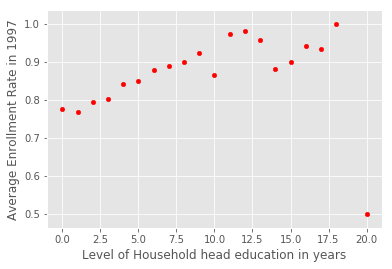

In [52]:
# Your code here

#plotting without mean
avg_enrollment=pd.DataFrame(progresa.where(progresa.year==97))
matplotlib.style.use('ggplot')
avg_enrollment.plot.scatter(x='hohedu',y='sc',use_index=True)
plt.xlabel("Level of Household head education in years")
plt.ylabel("Average Enrollment Rate in 1997")

#plotting average enrollment rate
avg_enrollment=avg_enrollment.groupby(avg_enrollment.hohedu).mean()
avg_enrollment.reset_index().plot.scatter(x='hohedu',y='sc',use_index=True,color='r')
plt.xlabel("Level of Household head education in years")
plt.ylabel("Average Enrollment Rate in 1997")


The average enrollment rates increase steadily from around 0.75 to 0.92 for household head education years between 1 and 9. At the 10 year mark we observe a slight drop in average enrollment rates to 0.86 and the from year 11 onwards its back on track to around 0.97. There are many such drops and increases in the average enrollment rates as the years of household head education increases further. It finally drops to 0.5 as we hit the 20 year mark.This can be explained as we have comparatively less data for this level i.e. only two records with 1 as enrolled and the other as not enrolled.

The general trend is -As household education goes up enrollment rate increases. But there are few points that indicate otherwise. Two significant dips can be observed. When the hohedu value is 10 and when it is 15, the enrollment rate drops contrary to the trend.


### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for
1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

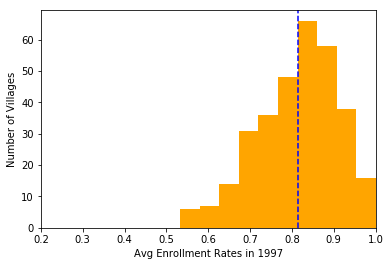

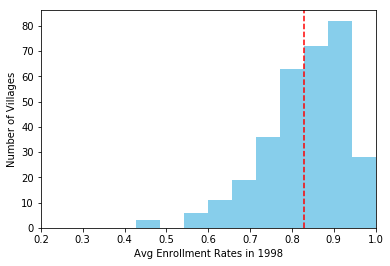

In [8]:
# Your code here
#for  year 1997:
avg_enrollment_97=pd.DataFrame(progresa.where((progresa.year==97)&(progresa.poor== 'pobre')&(progresa.progresa== 'basal')))
avg_enrollment_97=avg_enrollment_97.groupby(avg_enrollment_97.village).mean()

fig = plt.figure()
ax = plt.hist(avg_enrollment_97['sc'],color="orange")
plt.xlim([0.2,1])
plt.xlabel("Avg Enrollment Rates in 1997")
plt.ylabel("Number of Villages")
plt.axvline(avg_enrollment_97.sc.mean(),color = 'blue',linestyle='dashed')
plt.show()

#for year 1998:
avg_enrollment_98=pd.DataFrame(progresa.where((progresa.year==98)&(progresa.poor== 'pobre')&(progresa.progresa== 'basal')))
avg_enrollment_98=avg_enrollment_98.groupby(avg_enrollment_98.village).mean()
fig = plt.figure()
ax = plt.hist(avg_enrollment_98['sc'],color="skyblue")
plt.xlim([0.2,1])
plt.xlabel("Avg Enrollment Rates in 1998")
plt.ylabel("Number of Villages")
plt.axvline(avg_enrollment_98.sc.mean(),color = 'red',linestyle='dashed')



In [71]:
#for statistical difference
(tval,pval)=sp.stats.ttest_ind(avg_enrollment_97.sc,avg_enrollment_98.sc,equal_var = False)
print(pval)

0.044249343422588405


From the above histograms we see that the overall mean of the average enrollment rates across villages in 1997 and 1998 has more or less remained the same at around 0.81 and 0.82. From the histogram, we see that there is a shift towards 0.8 and 0.9 in the year 1998 compared to the year 1997. A t-test confirms that the difference is statistically significant as the p-value < 0.05, although marginally(p value=0.044).


## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Cross-Sectional Estimator: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [76]:
# Your code her:')
treatment_98=pd.Series(progresa.loc[:,'sc'].where((progresa.year==98)&(progresa['poor']=="pobre")&(progresa['progresa']=="basal")))
print('The average enrollment rate among poor households in the treatment vilages is:')
print (np.mean(treatment_98))

control_98=pd.Series(progresa.loc[:,'sc'].where((progresa.year==98)&(progresa['poor']=="pobre")&(progresa['progresa']=="0")))
print('The average enrollment rate among poor households in the control vilages is:')
print(np.mean(control_98))
(tval,pval)=sp.stats.ttest_ind(treatment_98,control_98,equal_var = False,nan_policy='omit')


#t test to determine statistical significance
ttest_ind(treatment_98[~np.isnan(treatment_98)],control_98[~np.isnan(control_98)])

The average enrollment rate among poor households in the treatment vilages is:
0.8464791213954308
The average enrollment rate among poor households in the control vilages is:
0.807636956730308


Ttest_indResult(statistic=8.358720567418374, pvalue=6.636344447523235e-17)

The average enrollment rates are 0.84 and 0.80 in the treated and control villages respectively.Using the t-test, we determine that the difference is statistically significant. We can conclude that the impact of progresa is evident in the year 1998 among the two groups.

### 2.2 Cross-Sectional Estimator: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [9]:
# Your code here

# Data for 1998 of the poor households
data_98 = progresa[(progresa['poor'] == 'pobre') & (progresa['year'] == 98)]
data_98.loc[data_98.progresa == 'basal', 'progresa'] = 1
data_98.loc[data_98.progresa == '0', 'progresa'] = 0

# Running a regression model of enrollment rates on treatment assignment
lm = smf.ols(formula='sc ~ progresa', data=data_98).fit()
print(lm.params)
print(lm.summary())

Intercept    0.807637
progresa     0.038842
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 01 May 2018   Prob (F-statistic):           6.64e-17
Time:                        17:05:12   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Based on this model, how much did Progresa increase the likelihood of a child enrolling?
The progressa value is 0.038842.Thus, Progresa increases the likelihood of a child enrolling by 0.038(we can find out the impact in terms of single difference of the enrollment rates in 1998 when subjected to the treatment).Further interpretting the parameters of the regression model: In absence of treatment, the average enrollment rates would have been 0.8076(intercept). When the family is subject to treatment, there is an expected increase of 0.038 in the average enrollment rates. 

How does your regression estimate compare to your t-test estimate from part 2.1?
The regression model agrees with the T test we performed in part 2.1. The average values of enrollment in Control Village was 0.8076 (in the absence of treatment), and the avg enrollment in treatment villages was 0.8464 (treatment == 1). This can be validated from our regression equation as: 0.8076 + 1 x 0.3884 = 0.8464.This matches the average enrollment rate in the treatment villages obtained from the simple differences test.



Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?
We can reject the null hypothesis, as the p-value obtained is below 0.05. It is statistically significant and implies that the progresa treatment did have a statistically significant effect.

What is the counterfactual assumption underlying this regression?
The counterfactual assumption underlying this regression is that in the absence of treatment, the results in the avg enrollment rates in the treated villages would be equal to the avg enrollment rates in the control villages.


### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [10]:
# Your code here

# Multiple linear regression with additional set of control variables# Multip 
multiple_lm = smf.ols(formula='sc ~ progresa + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohwag + welfare_index + age + hohage', data=data_98).fit()
multiple_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     849.5
Date:                Tue, 01 May 2018   Prob (F-statistic):               0.00
Time:                        17:24:49   Log-Likelihood:                -7541.1
No. Observations:               27263   AIC:                         1.511e+04
Df Residuals:                   27250   BIC:                         1.521e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4431      0.018     80.855      0.000       1.408       1.478
progresa          0.0337      0.004      8.418      0.000       0.026       0.042
sex               0.0304      0.004      7.847      0.000       0.023       0.038
indig             0.0188      0.005      3.961      0.000       0.009       0.028
dist_sec         -0.0106      0.001    -12.012      0.000      -0.012      -0.009
fam_n             0.0006      0.001      0.727      0.467      -0.001       0.002
min_dist          0.0004   6.34e-05      6.326      0.000       0.000       0.001
dist_cap          0.0002    3.7e-05      5.512      0.000       0.000       0.000
hohedu            0.0079      0.001      9.224      0.000       0.006       0.010
hohwag         -7.23e-07   2.81e-06     -0.257      0.797   -6.24e-06    4.79e-06
welfare_index  2.283e-05   1.82e-05      1.253      0.210   -1.29e-05    5.85e-05
age              -0.0657      0.001    -94.750      0.000      -0.067      -0.064
hohage        -2.299e-05      0.000     -0.118      0.906      -0.000       0.000
==============================================================================
Omnibus:                     2940.375   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.254
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       3.237   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


How do the controls affect the point estimate of treatment effect?
Introducing the control factors has changed the point estimate for the treatment effect progress and it has decreased from 0.0388 in the single linear model to 0.0337 in the multiple regression model. This is not a huge drop but there are some changes in the intercept value of this model.Also,the R sqaured value of this model is much better at 0.272 as compared to the previous single regression model whose R squared value is 0.003.


How do the controls affect the standard error on the treatment effect?
The introduction of the control variables has improved the standard error on the treatment effect(progressa) from 0.005 to 0.004. Since the standard error of the estimate is a measurement of accuracy of a prediction, this introduction of other variables has made the prediction of our treatment effect stronger  and gives us a better representation.

How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
The estimate of the intercept value in multiple regression is 1.4431 which is greater than 1 as compared to 0.8076 from the model in 2.2. Now, taking a deeper look at the other estimates we notice that the estimate of age and nearest distance to a secondary school are negative at -0.0657 and -0.0106 respectively. This means that for increase in age of a child by 1 year, there would be a decrease in the avg enrollment rates by 0.0657 units assuming other factors remain constant. Also, for every one mile farther the school is located, this decreases the avg enrollment rate by 0.0106 holding other factors constant. Older students are less likely to enroll into school and families staying far are also less likely to send their kids to school. The most influencing factor for school enrollment is still the treatment effect of the progresa fund given to families which has an estimate of 0.0337.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [16]:
# Your code here

# Subsetting data for two years separately:
data_97 = progresa[(progresa['poor'] == 'pobre') & (progresa['year'] == 97)]
data_98 = progresa[(progresa['poor'] == 'pobre') & (progresa['year'] == 98)]

# Creating a new dataframe for showing results in a tabular format
index = ['Avg Enrollment Before Treatment', 'Avg Enrollment After Treatment']
cols = ['Control Group', 'Treatment Group']
double_diff = pd.DataFrame(index = index, columns = cols)

# Calculating mean values
treat_98 = data_98['sc'][data_98.progresa == 'basal'].mean() 
treat_97 = data_97['sc'][data_97.progresa == 'basal'].mean()
control_98 =  data_98['sc'][data_98.progresa == '0'].mean()
control_97 =  data_97['sc'][data_97.progresa == '0'].mean()

# Finding the difference in difference value for impact evaluation of our treatment effect
diff_in_diff = (treat_98 - treat_97) - (control_98 - control_97)
print("The result of Difference-in-Difference gives us the estimate of the treatment effect on enrollment rates::")
print ("The value is: ", diff_in_diff)

#differences in treatement
treatment_difference = treat_98 - treat_97
print("Difference between treatment groups is  %f" % treatment_difference)

#differences in control
control_difference = control_98 - control_97
print("Difference between control groups is  %f" % control_difference)

print ("\nSee table below for individual average values for treatment and control groups before and after treatment:")
double_diff.loc["Avg Enrollment Before Treatment","Control Group"] = control_97
double_diff.loc["Avg Enrollment After Treatment","Control Group"] = control_98
double_diff.loc["Avg Enrollment Before Treatment","Treatment Group"] = treat_97
double_diff.loc["Avg Enrollment After Treatment","Treatment Group"] = treat_98
double_diff



The result of Difference-in-Difference gives us the estimate of the treatment effect on enrollment rates::
The value is:  0.031331280319323085
Difference between treatment groups is  0.023782
Difference between control groups is  -0.007549

See table below for individual average values for treatment and control groups before and after treatment:


,Control Group,Treatment Group
Avg Enrollment Before Treatment,0.815186,0.822697
Avg Enrollment After Treatment,0.807637,0.846479


What is your estimate of the impact, and how does it compare to your earlier (simple difference) results? 

The estimate of the treatment impact is 0.03133. The impact of the treatment is reduced compared to the simple difference result of 0.0388 obtained in the single regression model(0.0337 in multiple regression with various factors). As established previously that the randomization process did not obtain ideal results, the difference in difference model is a better estimate of the treatment impact.


What is the counterfactual assumption underlying this estimate? 
The counterfactual assumption is that difference-in-difference value would have been 0, i.e the average enrollment difference between the treatment group and control group would have been the same in 97 and 98, in the absence of the treatment.



### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [22]:
progresa.loc[progresa.year == 97, 'after'] = 0
progresa.loc[progresa.year == 98, 'after'] = 1

progresa_97_98_poor = progresa[progresa.poor == 'pobre']

double_diff_lm = smf.ols(formula = 'sc ~ progresa + after + progresa:after + age + dist_sec + sex + hohedu + indig + fam_n + min_dist+ hohage + hohedu',
                data=progresa_97_98_poor).fit()
double_diff_lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     2081.
Date:                Tue, 01 May 2018   Prob (F-statistic):               0.00
Time:                        22:32:13   Log-Likelihood:                -16562.
No. Observations:               58157   AIC:                         3.315e+04
Df Residuals:                   58145   BIC:                         3.326e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.4282      0.010    146.029      0.000       1.409       1.447
progresa[T.basal]           0.0020      0.004      0.527      0.598      -0.005       0.009
after                       0.0273      0.004      6.279      0.000       0.019       0.036
progresa[T.basal]:after     0.0313      0.006      5.692      0.000       0.021       0.042
age                        -0.0658      0.000   -143.647      0.000      -0.067      -0.065
dist_sec                   -0.0103      0.001    -16.679      0.000      -0.011      -0.009
sex                         0.0333      0.003     12.456      0.000       0.028       0.038
hohedu                      0.0078      0.001     13.472      0.000       0.007       0.009
indig                       0.0329      0.003     10.899      0.000       0.027       0.039
fam_n                      -0.0002      0.001     -0.365      0.715      -0.001       0.001
min_dist                    0.0006   3.39e-05     16.959      0.000       0.001       0.001
hohage                      0.0003      0.000      2.549      0.011    7.65e-05       0.001
==============================================================================
Omnibus:                     5461.777   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7167.479
Skew:                          -0.858   Prob(JB):                         0.00
Kurtosis:                       3.108   Cond. No.                         914.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.

The estimate of the impact of Progresa is 0.0313. To obtain this result, the year variable was changed to after = 1 (1998) and after = 0 (1997). There is an increase in average enrollment in the treatment group in 1998 with 0.0313 as the new coefficient while controlling for other variables, with a standard error of 0.006.


How do these estimates of the treatment effect compare to the estimates based on the simple difference?
The estimates obtained here are lower than the simple difference as it considers the difference in the treatment and control group prior to the treatment. Hence the estimate is more precise.

How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
This estimate is equal to the one obtained in 2.4. A marginal difference in the decimal values can be attributed to the control variables introduced.

What is the counterfactual assumption underlying this regression?
The counterfactual assumption is that the difference in difference value would have been 0, i.e the average enrollment difference between the treatment group and control group would have been the same in 97 and 98, in the absence of the treatment.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

Yes, Progresa did have a causal impact on the enrollment rates of poor households in Mexico. The causal impact is not significant but is definetely observed among treatment groups in the poor households.The magnitude of the impact is not drastically high as growth in enrollment rates occurs over a period of time as the scale of the program grows and more households are treated with the subsidy. Assuming that the study was conducted with good randomization and the treatment and control groups do not differ significantly allows us to measure the causal impact accurately.


There are differences in the demographic details between control and treatment groups.Some of the factors or demographic variables that vary are statistically significant. This tells us that the treatment and control groups are not two equal entities. When a variables such as age, welfare index and distance from capital which are considered crucial towards education enrollment vary, the analysis on the data obtained from such groups will be biased. We first performed simple difference to check if the differences between groups were statistically significant. We then resorted to the diff-in-diff method to understand the impact of progresa on poor families in treatment and control villages over  two years 97 and 98. The analyses of the data for before and after treatment and for poor and non-poor tells us that the Progresa study has a positive impact on increasing the overall enrollment rate in the community.



